In [8]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from pyclustering.cluster.xmeans import xmeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

In [9]:
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

data_ = data[featuress]
scaler = RobustScaler()
np.random.seed(42)
scaled_features = scaler.fit_transform(data_)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 
kmeans.fit(scaled_features)
initial_centers = kmeans.cluster_centers_

model = xmeans(scaled_features.tolist(), initial_centers=initial_centers.tolist(), kmax=10)
model.process()

clusters = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
provinces = data['Province'].tolist()  

for cluster_idx, cluster in enumerate(clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

Cluster 1: Aceh, Sumatera Barat, Jambi, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Sulawesi Tengah, Papua, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Cluster 2: Kep. Riau, Bengkulu, Kep. Bangka Belitung, Gorontalo, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua Barat
Cluster 3: Riau, Sumatera Selatan, Lampung, Sulawesi Selatan, Bali
Cluster 4: Sumatera Utara
Cluster 5: Banten
Cluster 6: Jawa Timur, Jawa Tengah, Jawa Barat, DKI Jakarta


In [10]:
labels = np.zeros(len(scaled_features))

for cluster_idx, cluster in enumerate(clusters):
    for i in cluster:
        labels[i] = cluster_idx  

sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.2309806378673689


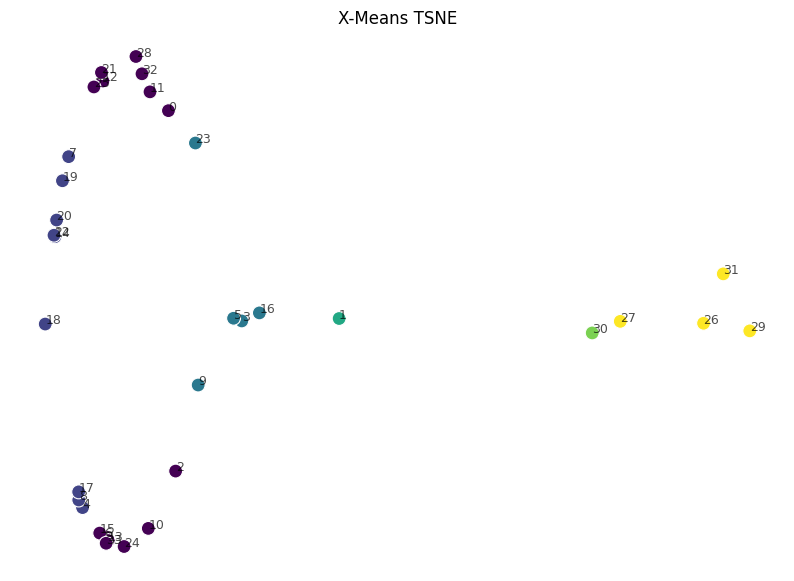

In [14]:
def plot_tsne_with_clusters(X, clusters, provinsi_names):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)  

    df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
    
    cluster_labels = np.zeros(len(X))  
    for cluster_idx, cluster in enumerate(clusters):
        cluster_labels[cluster] = cluster_idx 

    df_tsne['Cluster'] = cluster_labels
    df_tsne['Provinsi'] = provinsi_names

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Cluster', palette='viridis', s=100, legend=None)

    for i in range(len(provinsi_names)):
        plt.text(df_tsne.loc[i, 'tSNE1'], df_tsne.loc[i, 'tSNE2'], str(i), fontsize=9, alpha=0.7)
    
    plt.title('X-Means TSNE')
    plt.axis("off")
    plt.show()

plot_tsne_with_clusters(scaled_features, clusters, data['Province'].tolist())

c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Jeff\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


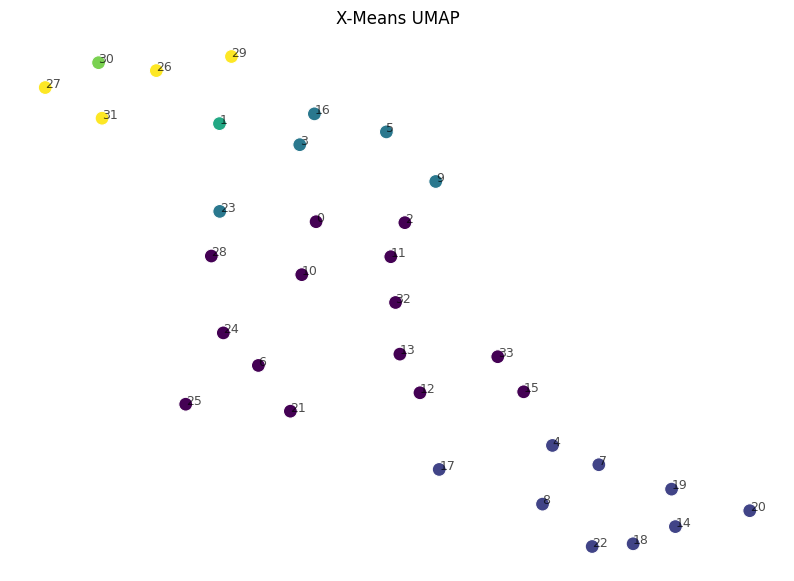

In [18]:
import umap

def plot_umap_with_clusters(X, clusters, provinsi_names, title='X-Means UMAP'):
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X)

    cluster_labels = np.zeros(len(X))
    for cluster_idx, cluster in enumerate(clusters):
        for i in cluster:
            cluster_labels[i] = cluster_idx

    df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    df_umap['Cluster'] = cluster_labels
    df_umap['Provinsi'] = provinsi_names

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100, legend=None)

    for i in range(len(df_umap)):
        plt.text(df_umap.loc[i, 'UMAP1'], df_umap.loc[i, 'UMAP2'], str(i), fontsize=9, alpha=0.7)

    plt.title(title)
    plt.axis('off')
    plt.show()

plot_umap_with_clusters(scaled_features, clusters, data['Province'].tolist())